# Section 1
NHANES dataset link: https://www.rdocumentation.org/packages/NHANES/versions/2.1.0/topics/NHANES

In [1]:
# Let's imagine that I would like to compare the relationship between height and race.
# I have a question to the class (Please answer it in private chat)
# Which data visualization tool should I be using to represent the relationship betwee height and race?

In [2]:
# What is race? Race is a categorical variable
# What is height? Height is a numerical variable

# Regression / scatter plots are used to examine the relationship between two numerical variables

# One of the ways to show categorical vs numerical data is box plot

In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Import dataframe
# This is the NHANES dataframe that was used in lectures
df = pd.read_csv('Data/NHANES.csv')

In [6]:
# Examine height
# Since we are only interested in adults, we will create a dataframe for adults
adult_df = df[df['Age'] >= 20]

In [7]:
# Get white and asian heights
white_df = adult_df[adult_df['Race3']=='White']
asian_df = adult_df[adult_df['Race3']=='Asian']

In [ ]:
# I didn't get anything here, because in boxplots, we should be deleting NaNs

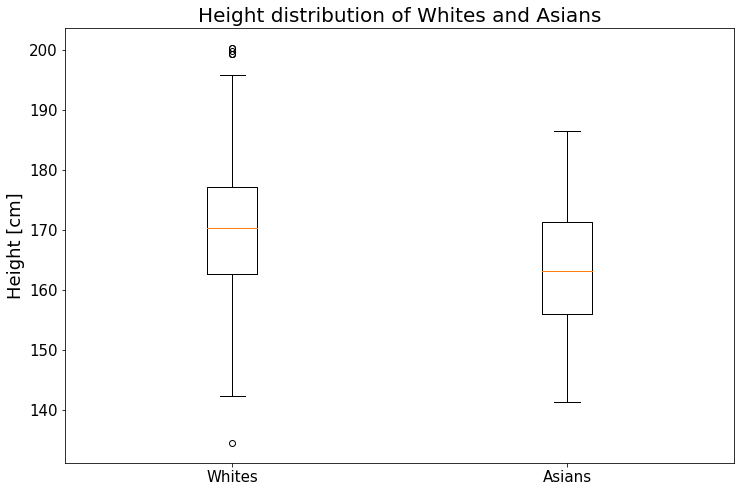

In [12]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([white_df['Height'].dropna(), asian_df['Height'].dropna()])
plt.title('Height distribution of Whites and Asians', fontsize=20)
axs.set_xticklabels(['Whites','Asians'])
axs.set_ylabel('Height [cm]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [13]:
# After I get the visual, I should be getting the summary statistics. Here, it's going to be the mean

In [14]:
# Get the average heights of two groups
print("Mean white height:", np.mean(white_df['Height'].dropna()))
print("Mean asian height:", np.mean(asian_df['Height'].dropna()))

Mean white height: 170.11167790893762
Mean asian height: 163.90682926829268


In [15]:
# Compute 95% CI of mean by using this function
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [16]:
# 95% CI of mean white height
CI_mean(white_df['Height'])

Average is: 170.11167790893762
95% CI of mean is: (169.70454631089385, 170.5188095069814)


In [18]:
# 95% CI of mean asian height
CI_mean(asian_df['Height'])

Average is: 163.90682926829274
95% CI of mean is: (162.55214567362887, 165.2615128629566)


In [19]:
# Function to compute 95% CI of mean difference
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [20]:
CI_mean_diff(white_df['Height'], asian_df['Height'])

The average difference is: 6.204848640644883
The 95% CI is: (4.7903085105046594, 7.619388770785107)


In [21]:
# What's my next step?
# Please respond to this question in private chat. 
# We want to compare the mean difference of two groups. We should be using a t test

In [23]:
# Conduct a two sample t-test
from scipy import stats

t_val, p_val = stats.ttest_ind(white_df['Height'].dropna(), asian_df['Height'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 8.50013875230022
p-value: 1.9787770986497343e-15


In [ ]:
# How can I report two sample t test results?
# One of the best ways to understand this is to search the internet

In [24]:
# As a next step, I will be comparing heights vs income
# Are richer people more likely to be tall? Or, are there more likely to be short?

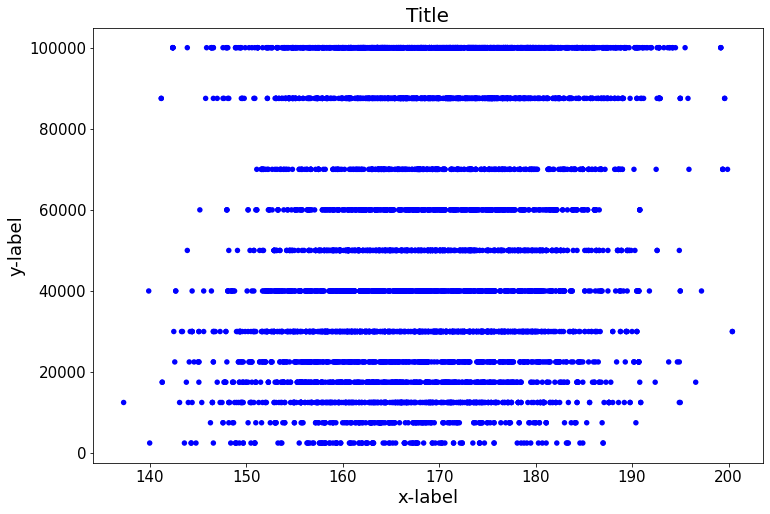

In [25]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(adult_df['Height'], adult_df['HHIncomeMid'], c='blue', edgecolors='none', s=30)
plt.title("Title", fontsize=20)
axs.set_xlabel("x-label", fontsize=18)
axs.set_ylabel("y-label", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

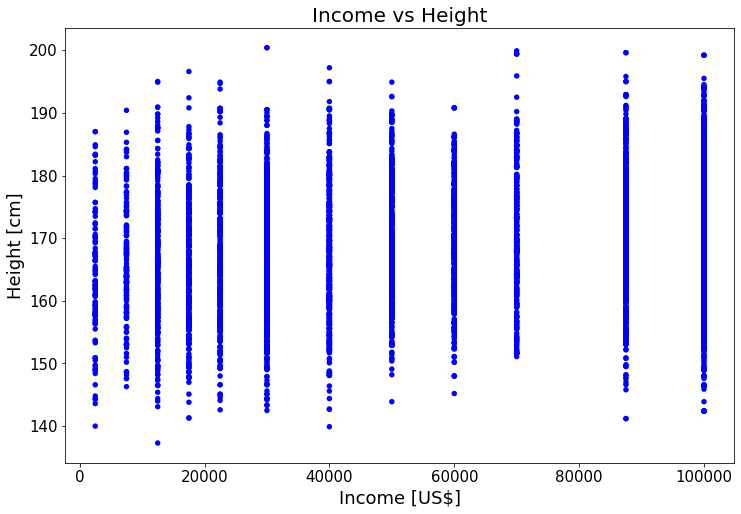

In [28]:
# Create a scatter plot
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(adult_df['HHIncomeMid'], adult_df['Height'], c='blue', edgecolors='none', s=30)
plt.title("Income vs Height", fontsize=20)
axs.set_xlabel("Income [US$]", fontsize=18)
axs.set_ylabel("Height [cm]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [31]:
# I drop nans in two columns specified here
# Please do not do dropna in the original dataframe, as you will drop all nans in columns that you plan not to use
new_df = adult_df.dropna(subset=['HHIncomeMid','Height'])

In [32]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = new_df['HHIncomeMid']
y_vals = new_df['Height']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     212.9
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.77e-47
Time:                        06:56:52   Log-Likelihood:                -24436.
No. Observations:                6584   AIC:                         4.888e+04
Df Residuals:                    6582   BIC:                         4.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         165.9149      0.248    670.257      0.000     165.430     166.400
HHIncomeMid  5.433e-05   3.72e-06     14.590      0.000     4.7e-05    6.16e-05
==============================================================================
Omnibus:                       50.168   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.914
Skew:                           0.044   Prob(JB):                     2.62e-08
Kurtosis:                       2.654   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 10,000 is 10^4, so I might multiply the coefficients by 10^4

In [34]:
# Get correlation coefficient
from scipy import stats
corr = stats.pearsonr(new_df['HHIncomeMid'], new_df['Height'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.17699991590242936
p-value: 1.774174321564612e-47


In [35]:
# Get regression parameters and set the x-values for plot
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(new_df['HHIncomeMid']), np.max(new_df['HHIncomeMid']), 100)

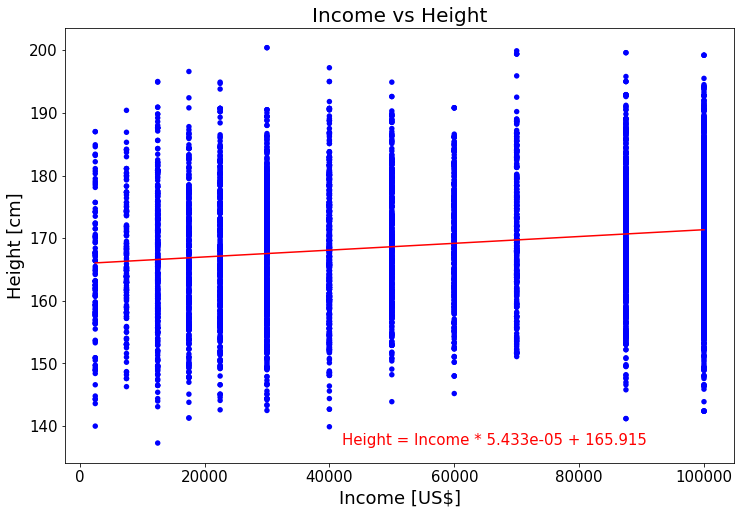

In [38]:
# Create a scatter plot with regression line
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(adult_df['HHIncomeMid'], adult_df['Height'], c='blue', edgecolors='none', s=30)
plt.title("Income vs Height", fontsize=20)
axs.set_xlabel("Income [US$]", fontsize=18)
axs.set_ylabel("Height [cm]", fontsize=18)
axs.plot(x_plot, x_plot*b1 + b0, color='red')
axs.tick_params(labelsize=15)
plt.text(42000, 137, "Height = Income * 5.433e-05 + 165.915", fontsize=15, color='red')
plt.show()
